In [50]:
# Write a discrete event simulation program for a blocking system,
#  i.e. a system with m service units and no waiting room.
#  The offered traffic A is the product of the mean arrival rate and the mean service time.

# The arrival process is modelled as a Poisson process.
#  Report the fraction of blocked customers, and a confidence interval for this fraction. 
#  Choose the service time distribution as exponential. Parameters: m = 10, mean service time = 8 time units,
#  mean time between customers = 1 time unit (corresponding to an offered traffic of 8 Erlang),
#  10 x 10.000 customers. This system is sufficiently simple such that the analytical solution is known.
#  See the last slide for the solution. Verify your simulation program using this knowledge.
#%%
import numpy as np
import math
from scipy.stats import t
import matplotlib.pyplot as plt

# Parameters 
m = 10
mst = 8
mtbc = 1

n_sim = 10
block_fractions = np.zeros(n_sim)

for j in range(n_sim):
    n_custom = 10000
    n = 0

    interval_between_arrivals = np.random.exponential(scale = mtbc, size = n_custom)
    arrival_times = np.cumsum(interval_between_arrivals)

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    print(f'fraction of blocks: {fraction}%')
    block_fractions[j] = fraction

# Exact solution
A = mst * mtbc
m_vect = np.arange(0,m+1)
denominator = np.sum(A**m_vect / [math.factorial(k) for k in m_vect])
B = A**m/math.factorial(m) / denominator

print(f'exact solution: {B*100}%')

fraction of blocks: 12.45%
fraction of blocks: 12.889999999999999%
fraction of blocks: 12.7%
fraction of blocks: 13.530000000000001%
fraction of blocks: 12.57%
fraction of blocks: 12.11%
fraction of blocks: 11.360000000000001%
fraction of blocks: 12.46%
fraction of blocks: 11.899999999999999%
fraction of blocks: 11.899999999999999%
exact solution: 12.16610642529515%


In [51]:
# Confidence interval

#theta_hat = np.sum(block_fractions)/n_sim
theta_hat = np.mean(block_fractions)
#print(theta_hat)
sigma_2 = np.var(block_fractions, ddof = 1)
#sigma_2 = (np.sum(block_fractions ** 2) - n_sim * theta_hat**2) / (n_sim -1)
print(sigma_2)  

dof = n_sim -1
alpha = 0.05
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant]

print(f'Confidence interval: {CI}')

0.3673344444444447
Confidence interval: [11.953435614150704, 12.820564385849297]


Point 2 simulation with Erlang distribution, k = 10
fraction of blocks: 5.89%
fraction of blocks: 6.77%
fraction of blocks: 6.260000000000001%
fraction of blocks: 6.84%
fraction of blocks: 6.54%
fraction of blocks: 5.8999999999999995%
fraction of blocks: 6.1%
fraction of blocks: 6.7299999999999995%
fraction of blocks: 6.72%
fraction of blocks: 6.800000000000001%
0.1456499999999955
Confidence interval: [6.181990337160078, 6.728009662839922]


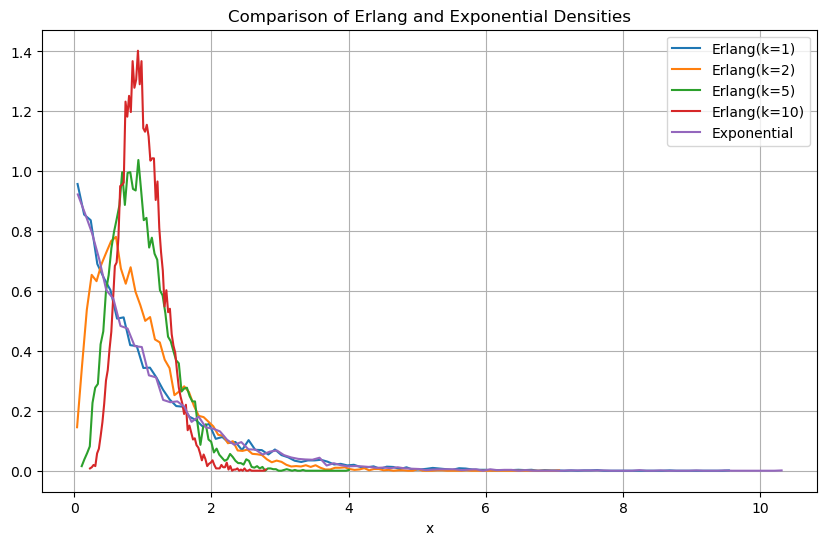

In [60]:

# Point 2
# . The arrival process is modelled as a renewal process using the same parameters as in Part 1 when possible.
#  Report the fraction of blocked customers, and a confidence interval for this fraction for at least the following two cases
#  (a) Experiment with Erlang distributed inter arrival times The Erlang distribution should have a mean of 1 (b)
#  hyper exponential inter arrival times. The parameters for the hyper exponential distribution should be
#  p1 = 0.8,λ1 = 0.8333,p2 = 0.2,λ2 = 5.0.

# (a)

k = 10
print(f'Point 2 simulation with Erlang distribution, k = {k}')

# Parameters 
m = 10
mst = 8
mtbc = 1

n_sim = 10
block_fractions = np.zeros(n_sim)

for j in range(n_sim):
    n_custom = 10000
    n = 0

    interval_between_arrivals = np.random.gamma(shape = k, scale = 1/k, size = n_custom)
    arrival_times = np.cumsum(interval_between_arrivals)

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    print(f'fraction of blocks: {fraction}%')
    block_fractions[j] = fraction


# Confidence interval

theta_hat = np.sum(block_fractions)/n_sim
#print(theta_hat)
sigma_2 = (np.sum(block_fractions ** 2) - n_sim * theta_hat**2) / (n_sim -1)
print(sigma_2)  

dof = n_sim -1
alpha = 0.05
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant]

print(f'Confidence interval: {CI}')

# Graphical comparion of densities
k_values = [1,2,5,10]

samples_exp = np.random.exponential(scale = mtbc, size = n_custom)

plt.figure(figsize=(10, 6))
for k in k_values:
    samples_erlang = np.random.gamma(shape=k, scale=1/k, size=n_custom)
    counts, bins = np.histogram(samples_erlang, bins=100, density=True)
    centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(centers, counts, label=f"Erlang(k={k})")
counts2, bins2 = np.histogram(samples_exp, bins=100, density=True)

centers2 = (bins2[:-1] + bins2[1:]) / 2

plt.plot(centers2, counts2, label="Exponential")
plt.title("Comparison of Erlang and Exponential Densities")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.show()


Point 2 simulation with Hyperexponential distribution
fraction of blocks: 13.66%
fraction of blocks: 13.61%
fraction of blocks: 13.05%
fraction of blocks: 14.19%
fraction of blocks: 13.850000000000001%
fraction of blocks: 13.600000000000001%
fraction of blocks: 12.83%
fraction of blocks: 12.740000000000002%
fraction of blocks: 14.829999999999998%
fraction of blocks: 14.67%
0.5112233333333683
Confidence interval: [13.191520645968305, 14.214479354031694]


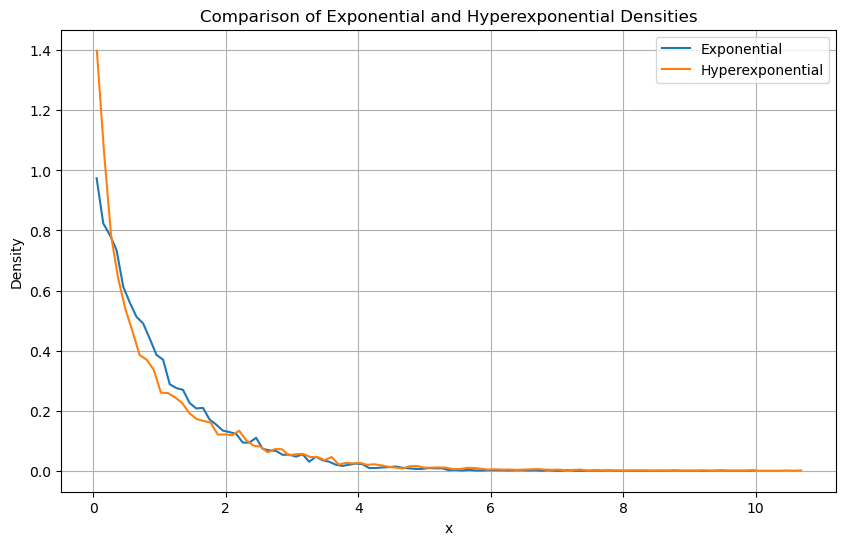

In [61]:
# (b) Hyperexponential 

p1 = 0.8
p2 = 0.2
lam1 = 0.8333
lam2 = 5.0

print(f'Point 2 simulation with Hyperexponential distribution')

# Parameters 
m = 10
mst = 8
mtbc = 1

n_sim = 10
block_fractions = np.zeros(n_sim)

for j in range(n_sim):
    n_custom = 10000
    n = 0

    exps = np.random.choice([0,1], p = [p1,p2], size = n_custom)
    interval_between_arrivals[exps == 0] = np.random.exponential(scale=1/lam1, size=np.sum(exps == 0))
    interval_between_arrivals[exps == 1] = np.random.exponential(scale=1/lam2, size=np.sum(exps == 1))
    arrival_times = np.cumsum(interval_between_arrivals)

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    print(f'fraction of blocks: {fraction}%')
    block_fractions[j] = fraction


# Confidence interval

theta_hat = np.sum(block_fractions)/n_sim
#print(theta_hat)
sigma_2 = (np.sum(block_fractions ** 2) - n_sim * theta_hat**2) / (n_sim -1)
print(sigma_2)  

dof = n_sim -1
alpha = 0.05
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant]

print(f'Confidence interval: {CI}')

#Compare the two distributions
samples_exp = np.random.exponential(scale=mtbc, size=n_custom)
choices = np.random.choice([0, 1], size=n_custom, p=[p1, p2])
samples_hyper = np.zeros(n_custom)
samples_hyper[choices == 0] = np.random.exponential(scale=1/lam1, size=np.sum(choices == 0))
samples_hyper[choices == 1] = np.random.exponential(scale=1/lam2, size=np.sum(choices == 1))

plt.figure(figsize=(10, 6))
counts_exp, bins_exp = np.histogram(samples_exp, bins=100, density=True)
centers_exp = (bins_exp[:-1] + bins_exp[1:]) / 2
plt.plot(centers_exp, counts_exp, label="Exponential")

counts_hyper, bins_hyper = np.histogram(samples_hyper, bins=100, density=True)
centers_hyper = (bins_hyper[:-1] + bins_hyper[1:]) / 2
plt.plot(centers_hyper, counts_hyper, label="Hyperexponential")

plt.title("Comparison of Exponential and Hyperexponential Densities")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Point 3
# Arrival process still a Poisson process, change service time distribution

# (a) Constant service time

print(f'Point 3: constant time service')

for j in range(n_sim):
    n_custom = 10000
    n = 0

    interval_between_arrivals = np.random.exponential(scale = mtbc, size = n_custom)
    arrival_times = np.cumsum(interval_between_arrivals)

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            #service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times[n] + mst
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    print(f'fraction of blocks: {fraction}%')
    block_fractions[j] = fraction


# Confidence interval

theta_hat = np.sum(block_fractions)/n_sim
#print(theta_hat)
sigma_2 = (np.sum(block_fractions ** 2) - n_sim * theta_hat**2) / (n_sim -1)
print(sigma_2)  

dof = n_sim -1
alpha = 0.05
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant]

print(f'Confidence interval: {CI}')

#%%
# (b) Pareto distribution
from scipy.stats import pareto

print(f'Point 3: Pareto distributed time services')

k = 2.05
#mst = E[X] = k /( k-1)*b => b = (k-1)*mst/k
b = (k-1)*mst/k

for j in range(n_sim):
    n_custom = 10000
    n = 0

    interval_between_arrivals = np.random.exponential(scale = mtbc, size = n_custom)
    arrival_times = np.cumsum(interval_between_arrivals)

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = pareto.rvs(k)*b
            service_in_use_times[i] = arrival_times[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    print(f'fraction of blocks: {fraction}%')
    block_fractions[j] = fraction


# Confidence interval

theta_hat = np.sum(block_fractions)/n_sim
#print(theta_hat)
sigma_2 = (np.sum(block_fractions ** 2) - n_sim * theta_hat**2) / (n_sim -1)
print(sigma_2)  

dof = n_sim -1
alpha = 0.05
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant]

print(f'Confidence interval: {CI}')

Point 3: constant time service
fraction of blocks: 12.22%
fraction of blocks: 12.2%
fraction of blocks: 12.57%
fraction of blocks: 12.58%
fraction of blocks: 11.44%
fraction of blocks: 11.540000000000001%
fraction of blocks: 11.98%
fraction of blocks: 12.83%
fraction of blocks: 12.31%
fraction of blocks: 11.53%
0.2374666666666801
Confidence interval: [11.771402633258088, 12.468597366741914]
Point 3: Pareto distributed time services
fraction of blocks: 11.65%
fraction of blocks: 12.030000000000001%
fraction of blocks: 11.98%
fraction of blocks: 12.920000000000002%
fraction of blocks: 11.89%
fraction of blocks: 12.65%
fraction of blocks: 11.940000000000001%
fraction of blocks: 12.65%
fraction of blocks: 13.059999999999999%
fraction of blocks: 12.49%
0.23687111111108708
Confidence interval: [11.977840040817984, 12.674159959182017]


# Comparing the two pareto distributions we notice that, for k = 1.05, the distribution
# presents way lower values with some sporadic high value, but not enough to balance the other low values
# therefore, the times to serve a client a way lower, resulting in fewer blocks

# Whereas, for k = 2.05, we get much higher values for the distribution, which lead to higher service time
# and therefore a higher number of blocks

In [64]:
# Uniform distribution 
print(f'Point 3: uniform distribution between 0 and 10 for service time')


for j in range(n_sim):
    n_custom = 10000
    n = 0

    interval_between_arrivals = np.random.exponential(scale = mtbc, size = n_custom)
    arrival_times = np.cumsum(interval_between_arrivals)

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.uniform(0,2*mst)
            service_in_use_times[i] = arrival_times[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    print(f'fraction of blocks: {fraction}%')
    block_fractions[j] = fraction


# Confidence interval

theta_hat = np.sum(block_fractions)/n_sim
#print(theta_hat)
sigma_2 = (np.sum(block_fractions ** 2) - n_sim * theta_hat**2) / (n_sim -1)
print(sigma_2)  

dof = n_sim -1
alpha = 0.05
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant]

print(f'Confidence interval: {CI}')

Point 3: uniform distribution between 0 and 10 for service time
fraction of blocks: 13.639999999999999%
fraction of blocks: 11.3%
fraction of blocks: 12.75%
fraction of blocks: 12.3%
fraction of blocks: 12.620000000000001%
fraction of blocks: 11.63%
fraction of blocks: 12.139999999999999%
fraction of blocks: 12.709999999999999%
fraction of blocks: 12.3%
fraction of blocks: 11.74%
0.4505566666666962
Confidence interval: [11.832827278552811, 12.793172721447187]


In [65]:
# Gaussian Distribution
print(f'Point 3: normal distribution for service time')


for j in range(n_sim):
    n_custom = 10000
    n = 0

    interval_between_arrivals = np.random.exponential(scale = mtbc, size = n_custom)
    arrival_times = np.cumsum(interval_between_arrivals)

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.normal(mst,3)
            service_in_use_times[i] = arrival_times[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    print(f'fraction of blocks: {fraction}%')
    block_fractions[j] = fraction


# Confidence interval

theta_hat = np.sum(block_fractions)/n_sim
#print(theta_hat)
sigma_2 = (np.sum(block_fractions ** 2) - n_sim * theta_hat**2) / (n_sim -1)
print(sigma_2)  

dof = n_sim -1
alpha = 0.05
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n_sim)*t_quant]

print(f'Confidence interval: {CI}')


Point 3: normal distribution for service time
fraction of blocks: 12.3%
fraction of blocks: 11.26%
fraction of blocks: 12.02%
fraction of blocks: 11.72%
fraction of blocks: 11.59%
fraction of blocks: 11.5%
fraction of blocks: 13.059999999999999%
fraction of blocks: 12.98%
fraction of blocks: 12.01%
fraction of blocks: 10.58%
0.5709955555555553
Confidence interval: [11.361445934432364, 12.442554065567638]
